In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

import pandas as pd


In [29]:
df = pd.read_csv('../datasets/df_flight_weather_8.csv')
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY_MIN,ARRIVAL_DELAY_MIN,DAY_OF_YEAR,DAY_IND,...,WDIR_CARDINAL_DEST,WSPD_DEST,UV_DESC_DEST,FEELS_LIKE_DEST,UV_INDEX_DEST,CLDS_DEST,WX_PHRASE_SIMPLE_DEST,SCHEDULED_DEPATURE_HR,SCHEDULED_ARRIVAL_HR,ARRIVAL_DELAY_MIN_CAT
0,1,2,5,DL,LAX,MSP,24.0,15.0,2,N,...,W,13.0,Low,6.0,0.0,OVC,Cloudy,0,6,15
1,1,2,5,AA,LAS,MIA,3.0,4.0,2,N,...,E,5.0,Low,75.0,0.0,SCT,Partly Cloudy,0,8,0
2,1,2,5,US,PHX,DTW,2.0,-14.0,2,N,...,SW,18.0,Low,19.0,0.0,OVC,Cloudy,0,6,-10
3,1,2,5,DL,SLC,ATL,1.0,-13.0,2,N,...,NW,12.0,Low,41.0,0.0,BKN,Mostly Cloudy,0,6,-10
4,1,2,5,DL,SEA,MSP,-5.0,-13.0,2,N,...,W,13.0,Low,6.0,0.0,OVC,Cloudy,0,5,-10


In [30]:
#remove nans
df = df.dropna()

<Axes: >

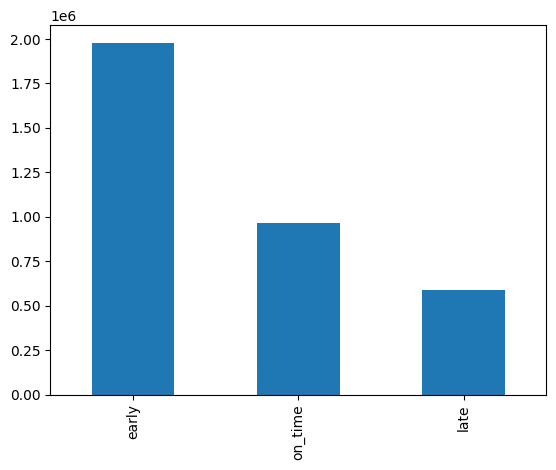

In [31]:
#make new column based on target variable; early (-5 or less) = 0, on time (between -5 and 5) = 1, late (5 or more) = 2
df['ARRIVAL_DELAY_MIN_CAT_3'] = df['ARRIVAL_DELAY_MIN_CAT'].apply(lambda x: 'early' if x <= -5 else 'on_time' if x <= 5 else 'late')
#plot distribution of target variable
df['ARRIVAL_DELAY_MIN_CAT_3'].value_counts().plot(kind='bar')

In [32]:
#remove column if it exists; DEPARTURE_DELAY_MIN, ARRIVAL_DELAY_MIN
if 'DEPARTURE_DELAY_MIN' in df.columns:
    df.drop('DEPARTURE_DELAY_MIN', axis=1, inplace=True)
if 'ARRIVAL_DELAY_MIN' in df.columns:
    df.drop('ARRIVAL_DELAY_MIN', axis=1, inplace=True)
if 'ARRIVAL_DELAY_MIN_CAT' in df.columns:
    df.drop('ARRIVAL_DELAY_MIN_CAT', axis=1, inplace=True)


In [33]:
# Convert object columns to numerical values using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

        
target = 'ARRIVAL_DELAY_MIN_CAT_3'
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
#print df head
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DAY_OF_YEAR,DAY_IND,TEMP,ICON_EXTD,...,WDIR_CARDINAL_DEST,WSPD_DEST,UV_DESC_DEST,FEELS_LIKE_DEST,UV_INDEX_DEST,CLDS_DEST,WX_PHRASE_SIMPLE_DEST,SCHEDULED_DEPATURE_HR,SCHEDULED_ARRIVAL_HR,ARRIVAL_DELAY_MIN_CAT_3
0,1,2,5,3,162,198,2,1,59.0,3300.0,...,16,13.0,2,6.0,0.0,4,0,0,6,1
1,1,2,5,0,160,186,2,1,43.0,3300.0,...,2,5.0,2,75.0,0.0,5,11,0,8,2
2,1,2,5,11,223,86,2,1,56.0,3300.0,...,14,18.0,2,19.0,0.0,4,0,0,6,0
3,1,2,5,3,266,18,2,1,14.0,3300.0,...,9,12.0,2,41.0,0.0,1,9,0,6,0
4,1,2,5,3,257,198,2,1,38.0,3300.0,...,16,13.0,2,6.0,0.0,4,0,0,5,0


In [ ]:

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)
accuracy_score(y_test, dt_pred)

In [ ]:
#random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
accuracy_score(y_test, rf_pred)

In [ ]:
#ensemble model, random forest
from matplotlib import pyplot as plt
from sklearn.ensemble import VotingClassifier

importance_features = {}
for i, feature in enumerate(X.columns):
    importance_features[feature] = rf.feature_importances_[i]

importance_features = sorted(importance_features.items(), key=lambda x: x[1], reverse=True)

plt.figure(figsize=(10, 10))
plt.barh([x[0] for x in importance_features[:10]], [x[1] for x in importance_features[:10]])
plt.title('Feature Importance')
plt.show()



In [ ]:
    #KNN
    from sklearn.neighbors import KNeighborsClassifier

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)

    knn_pred = knn.predict(X_test)
    accuracy_score(y_test, knn_pred)

In [35]:
#SVM
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

svm_pred = svm.predict(X_test)
accuracy_score(y_test, svm_pred)


In [ ]:
#neural network
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(X_train, y_train)

mlp_pred = mlp.predict(X_test)
accuracy_score(y_test, mlp_pred)


In [ ]:
#ada boost
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)


ada_pred = ada.predict(X_test)
accuracy_score(y_test, ada_pred)


In [ ]:
#gradient boost
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

gb_pred = gb.predict(X_test)
accuracy_score(y_test, gb_pred)